# 1. Data creation

In [1]:
import torch

# Define the number of samples and the range of values for each variable
n_samples = 200
start = 0
end = 1

# Generate the independent variables
# Generate the independent variables
X1 = torch.rand(n_samples, 1) * (end - start) + start
X2 = 0.5 * X1 + 0.2
X3 = 0.6 * X2 + 0.2
X4 = 0.7 * X3 + 0.2 
X5 = 0.8 * X4 + 0.2 


# Generate the dependent variable as a weighted sum of the independent variables
weights = [0.7, 0.8, 0.9, 1.0, 1.1]
bias = 0.5
y = sum(weight * X for weight, X in zip(weights, [X1, X2, X3, X4, X5])) + bias

# Concatenate the independent variables and the dependent variable to create the dataset
dataset = torch.cat([X1, X2, X3, X4, X5, y], dim=1)

# Print the shape of the dataset
print(dataset.shape)  # Should print: torch.Size([200, 6])


torch.Size([200, 6])


In [2]:
dataset

tensor([[0.4106, 0.4053, 0.4432, 0.5102, 0.6082, 2.6897],
        [0.6445, 0.5222, 0.5133, 0.5593, 0.6475, 3.1025],
        [0.5858, 0.4929, 0.4957, 0.5470, 0.6376, 2.9989],
        ...,
        [0.7443, 0.5722, 0.5433, 0.5803, 0.6642, 3.2787],
        [0.4870, 0.4435, 0.4661, 0.5263, 0.6210, 2.8246],
        [0.4702, 0.4351, 0.4610, 0.5227, 0.6182, 2.7949]])

# 2. TRAIN TEST SPLIT

In [3]:
import torch

# Define the proportion of data to use for training
train_proportion = 0.8

# Calculate the number of samples to use for training and testing
n_train = int(train_proportion * dataset.shape[0])
n_test = dataset.shape[0] - n_train

# Split the dataset into training and testing sets
train_data = dataset[:n_train, :]
test_data = dataset[n_train:, :]

# Print the shapes of the training and testing sets
print(train_data.shape)  # Should print: torch.Size([160, 6])
print(test_data.shape)  # Should print: torch.Size([40, 6])


torch.Size([160, 6])
torch.Size([40, 6])


In [4]:
import matplotlib.pyplot as plt

# Split the dataset into independent variables (X) and dependent variable (y)
X = dataset[:, :-1]
y = dataset[:, -1]

# Split the data into training and testing sets
train_proportion = 0.8
n_train = int(train_proportion * X.shape[0])
X_train, y_train = X[:n_train, :], y[:n_train]
X_test, y_test = X[n_train:, :], y[n_train:]

# 3. data visualizer function

In [5]:
def data_visualizer(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predicted = None):

  plt.figure(figsize=(7,5))

  # Training scatter plot
  plt.scatter(train_data,train_labels, c ='b', s=4, label='Training data')
  
  # Tesing scatter plot
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predicted is not None:
    # Tesing scatter plot
    plt.scatter(test_data, predicted, c='r', s=4, label='Predictions')
      
  plt.xlabel("X-axis (Independent variable)")
  plt.ylabel("Y-axis (Dependent variable)")
  plt.legend(title ="Nomenclature")

# 4. Visualizing the data

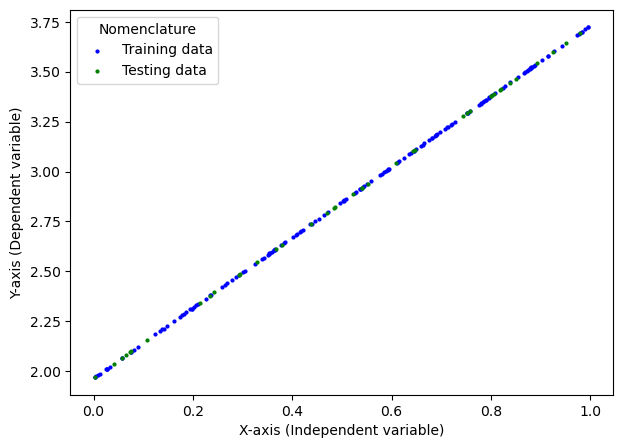

In [6]:


# Call the data_visualizer function to visualize the data
data_visualizer(X_train[:, 0], y_train, X_test[:, 0], y_test)

# 5. Subclassing the nn.Module to create a model

In [7]:
from torch import nn
# Setting seed for repeatability of experimentation
torch.manual_seed(seed = 12)

class LinearRegression(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    return self.linear(x)

# class LinearRegression(nn.Module):
#   def __init__(self, input_size):
#     super().__init__()
#     self.linear1 = nn.Linear(input_size, 16)
#     self.relu = nn.ReLU()
#     self.linear2 = nn.Linear(16, 1)

#   def forward(self, x):
#     x = self.linear1(x)
#     x = self.relu(x)
#     x = self.linear2(x)
#     return x

In [8]:
# instantiating our model
model = LinearRegression(input_size=5)

#  6. Metric and optimizer

In [9]:
loss_fn = nn.L1Loss()

# Defining the optimizer
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

# 7. Training the model with pytorch training loop

In [10]:
epochs = 150
# Training loop
for epoch in range(epochs):
    # Setting the model to training mode
    model.train()

    # Zeroing the gradients
    optimizer.zero_grad()

    # Forward pass
    preds = model(X_train)

    # Computing the loss
    loss = loss_fn(preds, y_train)

    # Backward pass
    loss.backward()

    # Updating the weights
    optimizer.step()

    # Printing the loss every 10 epochs
    if (epoch + 1) % 2 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 2/150, Loss: 3.3340
Epoch 4/150, Loss: 3.2617
Epoch 6/150, Loss: 3.1894
Epoch 8/150, Loss: 3.1172
Epoch 10/150, Loss: 3.0449
Epoch 12/150, Loss: 2.9726
Epoch 14/150, Loss: 2.9003
Epoch 16/150, Loss: 2.8281
Epoch 18/150, Loss: 2.7558
Epoch 20/150, Loss: 2.6835
Epoch 22/150, Loss: 2.6112
Epoch 24/150, Loss: 2.5390
Epoch 26/150, Loss: 2.4667
Epoch 28/150, Loss: 2.3944
Epoch 30/150, Loss: 2.3221
Epoch 32/150, Loss: 2.2499
Epoch 34/150, Loss: 2.1776
Epoch 36/150, Loss: 2.1053
Epoch 38/150, Loss: 2.0331
Epoch 40/150, Loss: 1.9608
Epoch 42/150, Loss: 1.8885
Epoch 44/150, Loss: 1.8162
Epoch 46/150, Loss: 1.7440
Epoch 48/150, Loss: 1.6717
Epoch 50/150, Loss: 1.5994
Epoch 52/150, Loss: 1.5271
Epoch 54/150, Loss: 1.4549
Epoch 56/150, Loss: 1.3826
Epoch 58/150, Loss: 1.3109
Epoch 60/150, Loss: 1.2405
Epoch 62/150, Loss: 1.1719
Epoch 64/150, Loss: 1.1058
Epoch 66/150, Loss: 1.0430
Epoch 68/150, Loss: 0.9839
Epoch 70/150, Loss: 0.9287
Epoch 72/150, Loss: 0.8782
Epoch 74/150, Loss: 0.8322
Epoch

C:\Users\Josh\Desktop\Machine_learning\env\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([160])) that is different to the input size (torch.Size([160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


# 8. Testing  on test data: MODEL EVALUATION

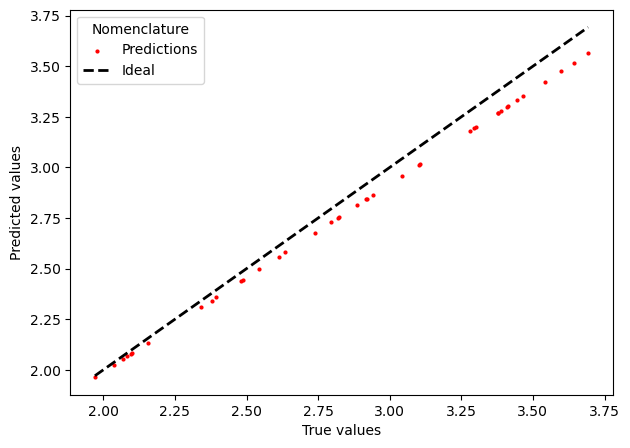

In [11]:
# Set the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    preds = model(X_test)

# Convert the predictions to a numpy array
preds = preds.detach().numpy()

# Convert the true labels to a numpy array
y_test = y_test.numpy()

# Create a scatter plot of the predicted values vs. the true values
plt.figure(figsize=(7, 5))
plt.scatter(y_test, preds, c='r', s=4, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend(title="Nomenclature")
plt.show()

